## Observations and Insights

### Analysis

1. Overall, it is clear that Capomulin and Ramicane are viable drug regimens to reduce tumor growth.
2. There is a strong correlation between mouse weight and tumor volume, indicating heavier weight may be a contributing factor in tumor growth and effectiveness of any drug regimen.
3. Capomulin and Ramicane had the highest number of mice complete the study, while all other regimens observed a number of deaths during the study, with Propriva having the most deaths out of all regimens.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_study_results_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
mouse_data_study_results_df.head()
#sort by Timepoint 
trial_sort_by_time = mouse_data_study_results_df.sort_values("Timepoint", ascending= True)
trial_sort_by_time.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1529,s619,Stelasyn,Male,22,30,0,45.0,0
558,a818,Naftisol,Female,12,28,0,45.0,0
1531,t198,Propriva,Male,22,26,0,45.0,0
551,a788,Zoniferol,Male,5,30,0,45.0,0


In [4]:
# Checking the number of mice in the DataFrame.
mouse_data_study_results_df["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_data_study_results_df.loc[mouse_data_study_results_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_study_results_df

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_trial_df =  mouse_data_study_results_df[mouse_data_study_results_df['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_mouse_trial_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_trial_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
mean_tumor_gb = clean_mouse_trial_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
# print(mean_tumor_gb)
median_tumor_gb = clean_mouse_trial_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
# print(median_tumor_gb)
var_tumor_gb = clean_mouse_trial_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
# print(var_tumor_gb)
std_tumor_gb = clean_mouse_trial_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
# print(std_tumor_gb)
sem_tumor_gb = clean_mouse_trial_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# print(sem_tumor_gb)
# data frame to hold info
summary_tumor_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_gb, "Median Tumor Volume": median_tumor_gb,
                                "Tumor Volume Variance": var_tumor_gb, "Tumor Volume Std. Dev.": std_tumor_gb,
                                "Tumor Volume Std. Err.": sem_tumor_gb})
#display data
summary_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_tumor = clean_mouse_trial_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_tumor

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

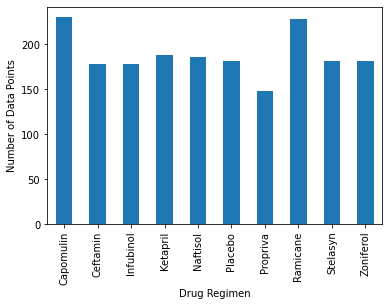

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_group = clean_mouse_trial_df.groupby('Drug Regimen')
timepoint_count = drug_group['Timepoint'].count()
timepoint_count

count_chart = timepoint_count.plot(kind = 'bar')
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Data Points")

plt.show()


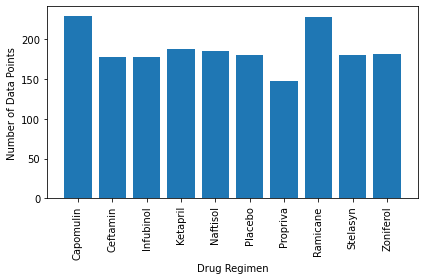

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_group = clean_mouse_trial_df.groupby('Drug Regimen')
timepoint_count = drug_group['Timepoint'].count()
timepoint_count

fig, ax = plt.subplots()
bars = plt.bar(timepoint_count.index, timepoint_count.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()

plt.show()

## Pie Plots

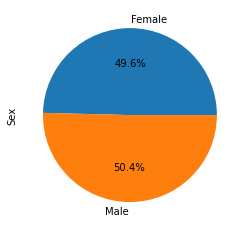

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_vs_male = clean_mouse_trial_df.groupby("Sex")['Mouse ID'].nunique()
female_vs_male

sex_chart = female_vs_male.plot(kind = 'pie', autopct = '%1.1f%%')
sex_chart.set_ylabel("Sex")
plt.show()

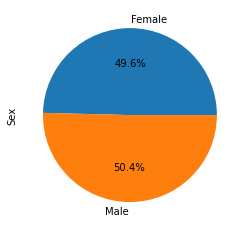

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_vs_male = clean_mouse_trial_df.groupby("Sex")['Mouse ID'].nunique()
female_vs_male

sex = female_vs_male.values
labels = female_vs_male.index
plt.pie(sex, labels = labels, autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_volume = clean_mouse_trial_df.groupby('Mouse ID').max().reset_index()
final_volume

merged_final = final_volume[['Mouse ID', 'Timepoint']].merge(clean_mouse_trial_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
merged_final

capomulin = merged_final.loc[merged_final["Drug Regimen"] == 'Capomulin']['Tumor Volume (mm3)']
capomulin

cap_quartiles = capomulin.quantile([0.25, 0.5, 0.75])
lowerq = cap_quartiles[0.25]
upperq = cap_quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
cap_outlier = capomulin.loc[(capomulin < lower_bound) | (capomulin > upper_bound)]
cap_outlier

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [17]:
ramicane = merged_final.loc[merged_final["Drug Regimen"] == 'Ramicane']['Tumor Volume (mm3)']
ramicane

ram_quartiles = ramicane.quantile([0.25, 0.5, 0.75])
lowerq = ram_quartiles[0.25]
upperq = ram_quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
ram_outlier = ramicane.loc[(ramicane < lower_bound) | (ramicane > upper_bound)]
ram_outlier

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [18]:
infubinol = merged_final.loc[merged_final["Drug Regimen"] == 'Infubinol']['Tumor Volume (mm3)']
infubinol

inf_quartiles = infubinol.quantile([0.25, 0.5, 0.75])
lowerq = inf_quartiles[0.25]
upperq = inf_quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
inf_outlier = infubinol.loc[(infubinol < lower_bound) | (infubinol > upper_bound)]
inf_outlier

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


31    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [19]:
ceftamin = merged_final.loc[merged_final["Drug Regimen"] == 'Ceftamin']['Tumor Volume (mm3)']
ceftamin

cef_quartiles = ceftamin.quantile([0.25, 0.5, 0.75])
lowerq = cef_quartiles[0.25]
upperq = cef_quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
cef_outlier = ceftamin.loc[(ceftamin < lower_bound) | (ceftamin > upper_bound)]
cef_outlier

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

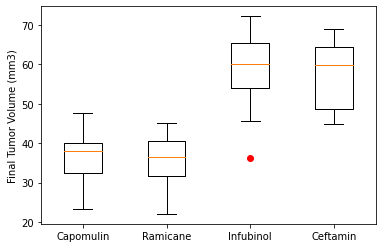

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_dict = {'Capomulin':capomulin, "Ramicane": ramicane, "Infubinol": infubinol, "Ceftamin": ceftamin}
boxplot_dict.values()

fig, ax = plt.subplots()
ax.boxplot(boxplot_dict.values(), 0, 'r')
ax.set_xticklabels(boxplot_dict.keys())
ax.set_ylabel("Final Tumor Volume (mm3)")

# # drug_box = plt.boxplot([capomulin, ramicane, infubinol, ceftamin])

plt.show()

## Line and Scatter Plots

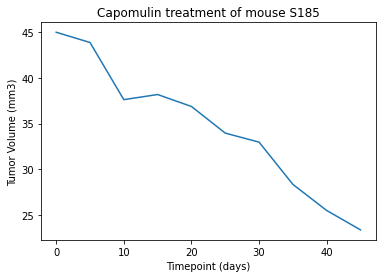

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_mouse_trial_df.loc[clean_mouse_trial_df["Drug Regimen"] == 'Capomulin']
capomulin
cap_mouse = capomulin.loc[capomulin['Mouse ID'] == 's185']
cap_mouse

x_axis_data = cap_mouse["Timepoint"].values
x_axis_data
y_axis_data = cap_mouse["Tumor Volume (mm3)"].values
y_axis_data

plt.plot(x_axis_data, y_axis_data)
plt.title("Capomulin treatment of mouse S185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

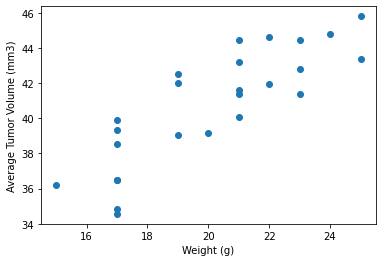

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_mouse_trial_df.loc[clean_mouse_trial_df["Drug Regimen"] == 'Capomulin']
capomulin.head(30)

capomulin = capomulin.set_index('Mouse ID')
capomulin.head(30)

cap_avg_tumor = capomulin.groupby('Mouse ID').agg({'Tumor Volume (mm3)': ['mean'],'Weight (g)':['median']})
cap_avg_tumor

weight = cap_avg_tumor.iloc[:,1]
avg_tumor_vol = cap_avg_tumor.iloc[:,0]
plt.scatter(weight, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


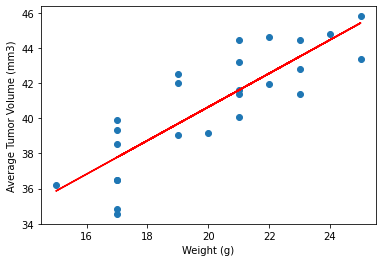

In [23]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen
weight = cap_avg_tumor.iloc[:,1]
avg_tumor_vol = cap_avg_tumor.iloc[:,0]
plt.scatter(weight, avg_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
plt.plot(weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
